# **Import libraries**

In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np
import seaborn as sns
import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

# **Read data using OS**

In [2]:
def load_data(data_directory):
    images = []
    labels = [] 
    classes = []
    label_encoder = LabelEncoder()
# iterating over classes in a directory, then iterating over the images within each class
    for class_name in os.listdir(data_directory):
        class_path = os.path.join(data_directory, class_name)
        classes.append(class_name)

        for filename in os.listdir(class_path):
            filepath = os.path.join(class_path, filename)
            img = cv2.imread(filepath)
 # Data Processing: 
# 1)resizing the images to (224, 224),
# 2)dividing by 255 to normalize pixel values, and converting to RGB.                     
            if img is not None:
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
                img = cv2.resize(img, (224, 224))
                img = img / 255.0
                images.append(img)
                labels.append(class_name)

    images = np.array(images)
    labels = label_encoder.fit_transform(labels) 

    return images, labels, classes

# **Update the path to dataset**

In [3]:
data_directory = '/kaggle/input/jellyfish-types'
images, labels, classes =load_data(data_directory)

# **train_test_split**

In [4]:
X_train, X_test ,y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# **dataset statistics**

In [5]:
X_train.shape

(720, 224, 224, 3)

In [6]:
np.unique(classes)

array(['Moon_jellyfish', 'Train_Test_Valid', 'barrel_jellyfish',
       'blue_jellyfish', 'compass_jellyfish', 'lions_mane_jellyfish',
       'mauve_stinger_jellyfish'], dtype='<U23')

# **Plot the distribution**

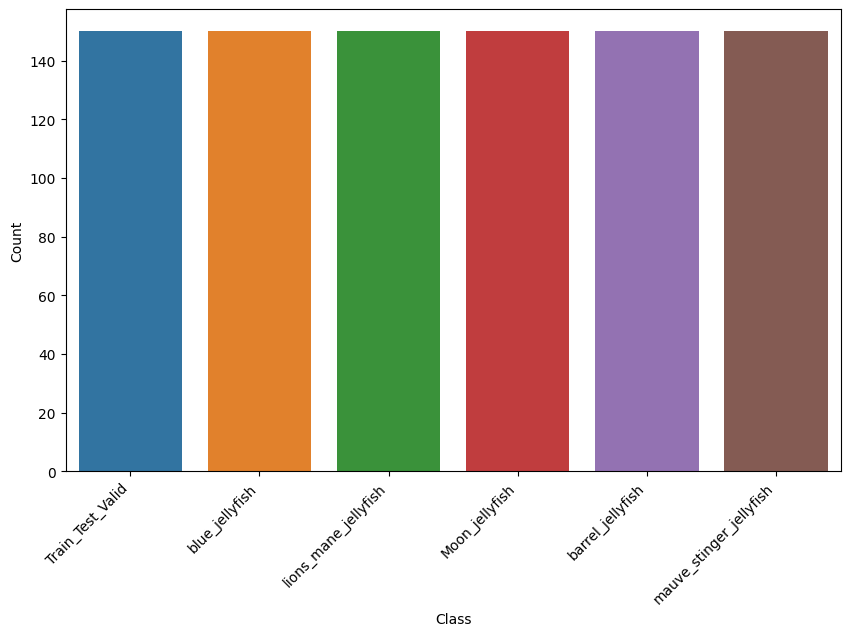

In [7]:
plt.figure(figsize=(10, 6))
sns.countplot(x=[classes[label] for label in labels])  
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

# **image show**

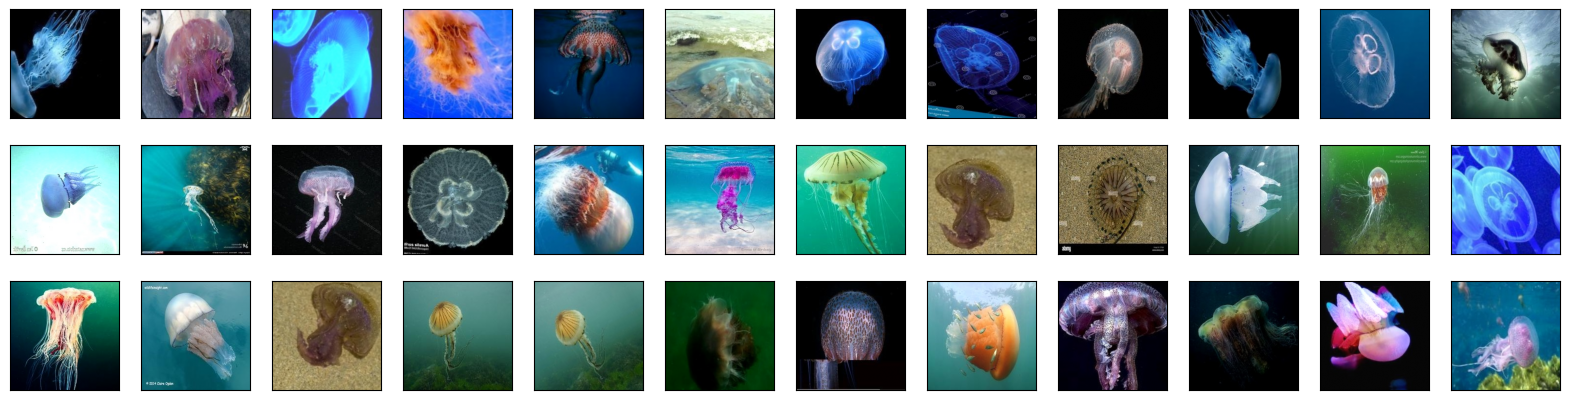

In [8]:
fig = plt.figure(figsize=(20,5))

for i in range(36):
    ax = fig.add_subplot(3,12, i+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(X_train[i]))

# **model**

In [9]:
from keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes=6)
y_test = to_categorical(y_test, num_classes=6)

In [10]:
model = Sequential()

model.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
          
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
          
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(.3)) 
          
model.add(Flatten())
model.add(Dense(255, activation='relu')) 
model.add(Dropout(.3))          
model.add(Dense(6, activation='softmax'))  
          
model.summary()      

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 16)      208       
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      2080      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        8256      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 28, 28, 64)        0

In [11]:
model.compile(loss='categorical_crossentropy',  metrics =['accuracy'])

In [12]:
model.fit(X_train, y_train,epochs=5,validation_data=(X_test,y_test))

Epoch 1/5
23/23 [==============================] - 20s 802ms/step - loss: 1.7692 - accuracy: 0.2958 - val_loss: 1.5806 - val_accuracy: 0.3222
Epoch 2/5
23/23 [==============================] - 17s 751ms/step - loss: 1.4659 - accuracy: 0.4014 - val_loss: 1.7720 - val_accuracy: 0.3278
Epoch 3/5
23/23 [==============================] - 18s 773ms/step - loss: 1.2397 - accuracy: 0.5139 - val_loss: 1.4786 - val_accuracy: 0.3722
Epoch 4/5
23/23 [==============================] - 17s 757ms/step - loss: 1.0816 - accuracy: 0.5889 - val_loss: 1.2136 - val_accuracy: 0.5722
Epoch 5/5
23/23 [==============================] - 17s 762ms/step - loss: 0.8953 - accuracy: 0.6722 - val_loss: 1.3143 - val_accuracy: 0.4944


In [13]:
model.compile(loss='categorical_crossentropy', optimizer = 'Nadam', metrics =['accuracy'])

In [14]:
model.fit(X_train, y_train, validation_data=(X_test,y_test), batch_size=500,epochs=20)

Epoch 1/20
2/2 [==============================] - 22s 7s/step - loss: 0.7584 - accuracy: 0.7208 - val_loss: 1.1397 - val_accuracy: 0.5944
Epoch 2/20
2/2 [==============================] - 17s 6s/step - loss: 0.6589 - accuracy: 0.7667 - val_loss: 1.1169 - val_accuracy: 0.6000
Epoch 3/20
2/2 [==============================] - 17s 7s/step - loss: 0.6153 - accuracy: 0.7861 - val_loss: 1.0831 - val_accuracy: 0.6056
Epoch 4/20
2/2 [==============================] - 17s 6s/step - loss: 0.6139 - accuracy: 0.7792 - val_loss: 1.2045 - val_accuracy: 0.5556
Epoch 5/20
2/2 [==============================] - 17s 6s/step - loss: 0.5988 - accuracy: 0.7986 - val_loss: 1.0517 - val_accuracy: 0.6222
Epoch 6/20
2/2 [==============================] - 17s 6s/step - loss: 0.4741 - accuracy: 0.8639 - val_loss: 0.9581 - val_accuracy: 0.6778
Epoch 7/20
2/2 [==============================] - 17s 7s/step - loss: 0.4341 - accuracy: 0.8764 - val_loss: 1.0171 - val_accuracy: 0.6667
Epoch 8/20
2/2 [==================

In [15]:
y_hat = model.predict(X_test)
test = model.evaluate(X_test, y_test)
print('Test Loss = ', test[0], 'Test Accuracy = ', test[1])

6/6 [==============================] - 1s 185ms/step - loss: 1.0247 - accuracy: 0.6889
Test Loss =  1.0247085094451904 Test Accuracy =  0.6888889074325562


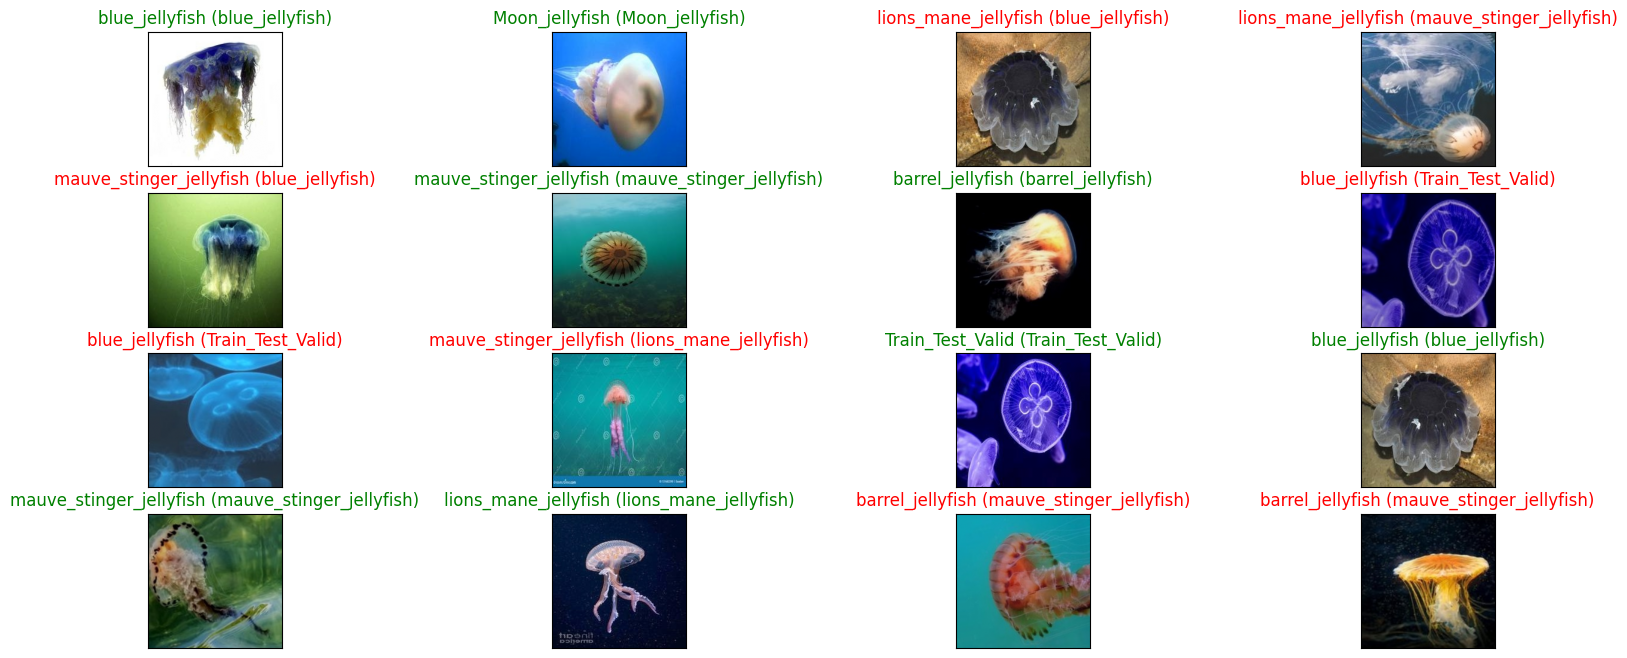

In [16]:
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(X_test.shape[0], size=16, replace=False)):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(X_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(classes[pred_idx], classes[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))

# **phase 2**


In [17]:
import tensorflow as tf
import datetime
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np
import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.utils import class_weight

In [18]:
datagen = ImageDataGenerator(
    rotation_range=30,         # Randomly rotate images by 20 degrees
    #brightness_range=[0., 0.5],  # Adjust brightness between 10% and 200%
    width_shift_range=0.1,     # Randomly shift images horizontally by 20% of the width
    height_shift_range=0.1,    # Randomly shift images vertically by 20% of the height
    zoom_range=0.3,            # Randomly zoom into images
    horizontal_flip=True,      # Randomly flip images horizontally
    vertical_flip=True,        # Randomly flip images vertically
)
datagen1 = ImageDataGenerator()

train_generator = datagen.flow(X_train, y_train, batch_size=20)
val_generator = datagen1.flow(X_test, y_test, batch_size=20)

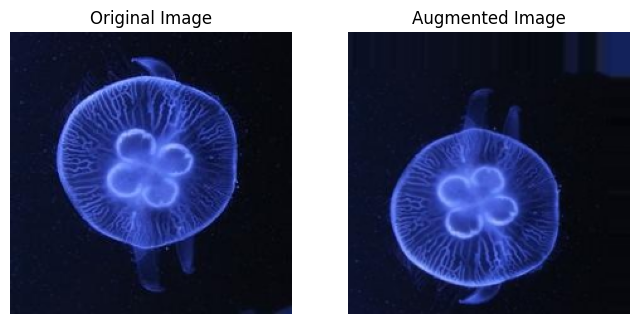

In [19]:
index = np.random.randint(0, len(X_train))

# Select the original image
original_image = (X_train[index]*255).astype(np.uint8)
original_image = original_image.astype(np.uint8)

# Reshape the selected image to (1, height, width, channels) to make it a batch of size 1
original_image = np.expand_dims(original_image, axis=0)

# Create an iterator for the batch (with only one sample)
iterator = datagen.flow(original_image, batch_size=1)

# Generate augmented images
augmented_images = (iterator.next()).astype(np.uint8)

# Display the original and augmented images
plt.figure(figsize=(8, 4))

# Original image
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(original_image[0])
plt.axis('off')

# Augmented image
plt.subplot(1, 2, 2)
plt.title('Augmented Image')
plt.imshow(augmented_images[0] ,vmax = 1., vmin = 0)
plt.axis('off')

plt.show()

In [20]:
history = model.fit(train_generator, epochs=100, validation_data=val_generator)

Epoch 1/100
36/36 [==============================] - 25s 659ms/step - loss: 1.3750 - accuracy: 0.5083 - val_loss: 1.2416 - val_accuracy: 0.5333
Epoch 2/100
36/36 [==============================] - 23s 634ms/step - loss: 1.1150 - accuracy: 0.5764 - val_loss: 1.0156 - val_accuracy: 0.6278
Epoch 3/100
36/36 [==============================] - 23s 635ms/step - loss: 1.0299 - accuracy: 0.6125 - val_loss: 0.9587 - val_accuracy: 0.6500
Epoch 4/100
36/36 [==============================] - 23s 625ms/step - loss: 1.0138 - accuracy: 0.6194 - val_loss: 0.9434 - val_accuracy: 0.6889
Epoch 5/100
36/36 [==============================] - 22s 616ms/step - loss: 0.9131 - accuracy: 0.6500 - val_loss: 1.0001 - val_accuracy: 0.6444
Epoch 6/100
36/36 [==============================] - 25s 675ms/step - loss: 0.9385 - accuracy: 0.6611 - val_loss: 0.8174 - val_accuracy: 0.7167
Epoch 7/100
36/36 [==============================] - 23s 621ms/step - loss: 0.8485 - accuracy: 0.6722 - val_loss: 0.8222 - val_accuracy:

In [21]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
# Find the epoch with the highest validation accuracy
best_epoch = val_accuracy.index(max(val_accuracy)) + 1  # Add 1 because epochs are 1-indexed
print(f"Best Accuracy: {accuracy[best_epoch-1]:.4f} at Epoch {best_epoch}")
print(f"Best Validation Accuracy: {val_accuracy[best_epoch-1]:.4f} at Epoch {best_epoch}")

Best Accuracy: 0.9681 at Epoch 85
Best Validation Accuracy: 0.9556 at Epoch 85


In [22]:
y_hat = model.predict(X_test)
test = model.evaluate(X_test, y_test)
print('Test Loss = ', test[0], 'Test Accuracy = ', test[1])

6/6 [==============================] - 1s 188ms/step - loss: 0.4609 - accuracy: 0.8778
Test Loss =  0.460921972990036 Test Accuracy =  0.8777777552604675


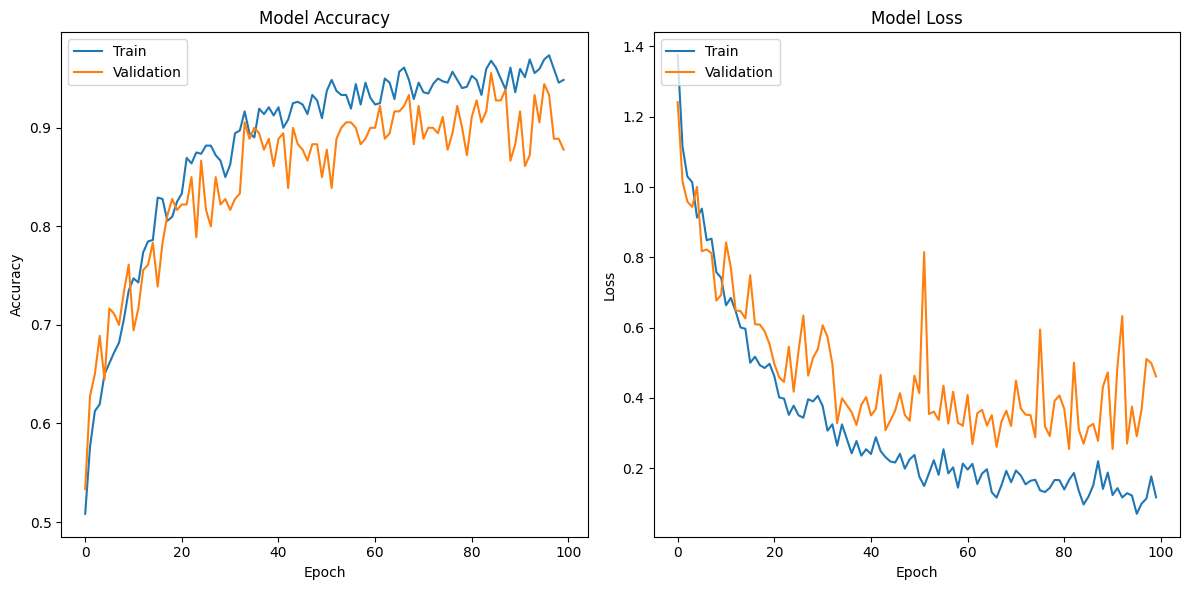

In [23]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

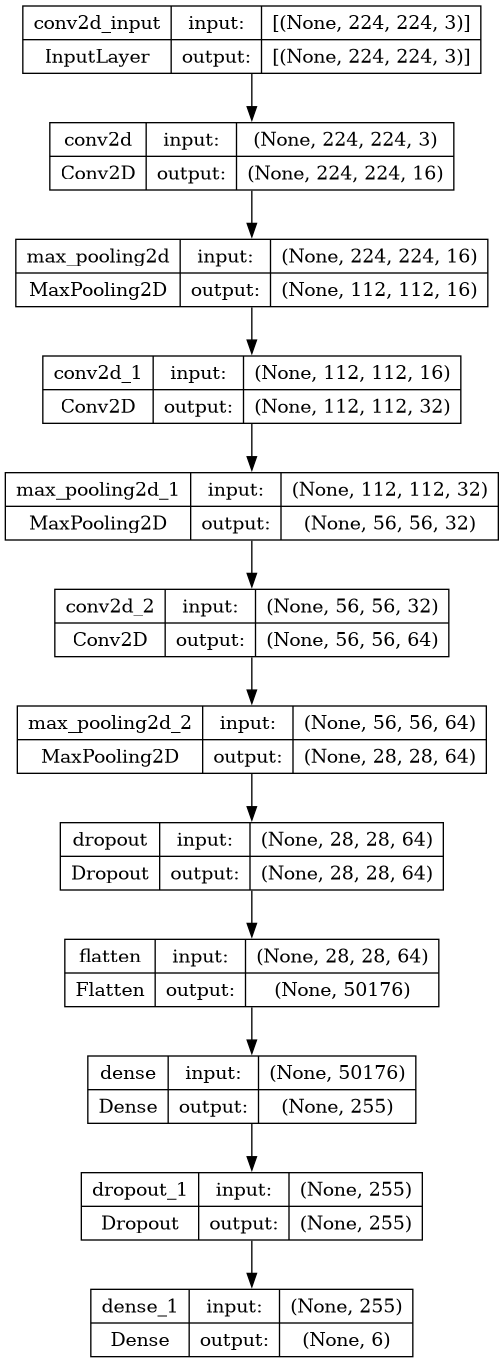

In [24]:
from keras.utils import plot_model

# Assuming this is the original Sequential model you defined
plot_model(model, to_file='sequential_model_plot.png', show_shapes=True, show_layer_names=True)

Epoch 1/20
23/23 [==============================] - 20s 801ms/step - loss: 0.0613 - accuracy: 0.9833 - val_loss: 0.4256 - val_accuracy: 0.9000 - lr: 0.0010
Epoch 2/20
23/23 [==============================] - 19s 774ms/step - loss: 0.0237 - accuracy: 0.9917 - val_loss: 0.5467 - val_accuracy: 0.8944 - lr: 0.0010
Epoch 3/20
23/23 [==============================] - 17s 755ms/step - loss: 0.0303 - accuracy: 0.9917 - val_loss: 0.6121 - val_accuracy: 0.8889 - lr: 0.0010
Epoch 4/20
23/23 [==============================] - 18s 775ms/step - loss: 0.0493 - accuracy: 0.9875 - val_loss: 0.3752 - val_accuracy: 0.9111 - lr: 0.0010
Epoch 5/20
23/23 [==============================] - 17s 750ms/step - loss: 0.0274 - accuracy: 0.9944 - val_loss: 0.3379 - val_accuracy: 0.9333 - lr: 0.0010
Epoch 6/20
23/23 [==============================] - 18s 772ms/step - loss: 0.0177 - accuracy: 0.9944 - val_loss: 0.3124 - val_accuracy: 0.9222 - lr: 0.0010
Epoch 7/20
23/23 [==============================] - 17s 762ms/st

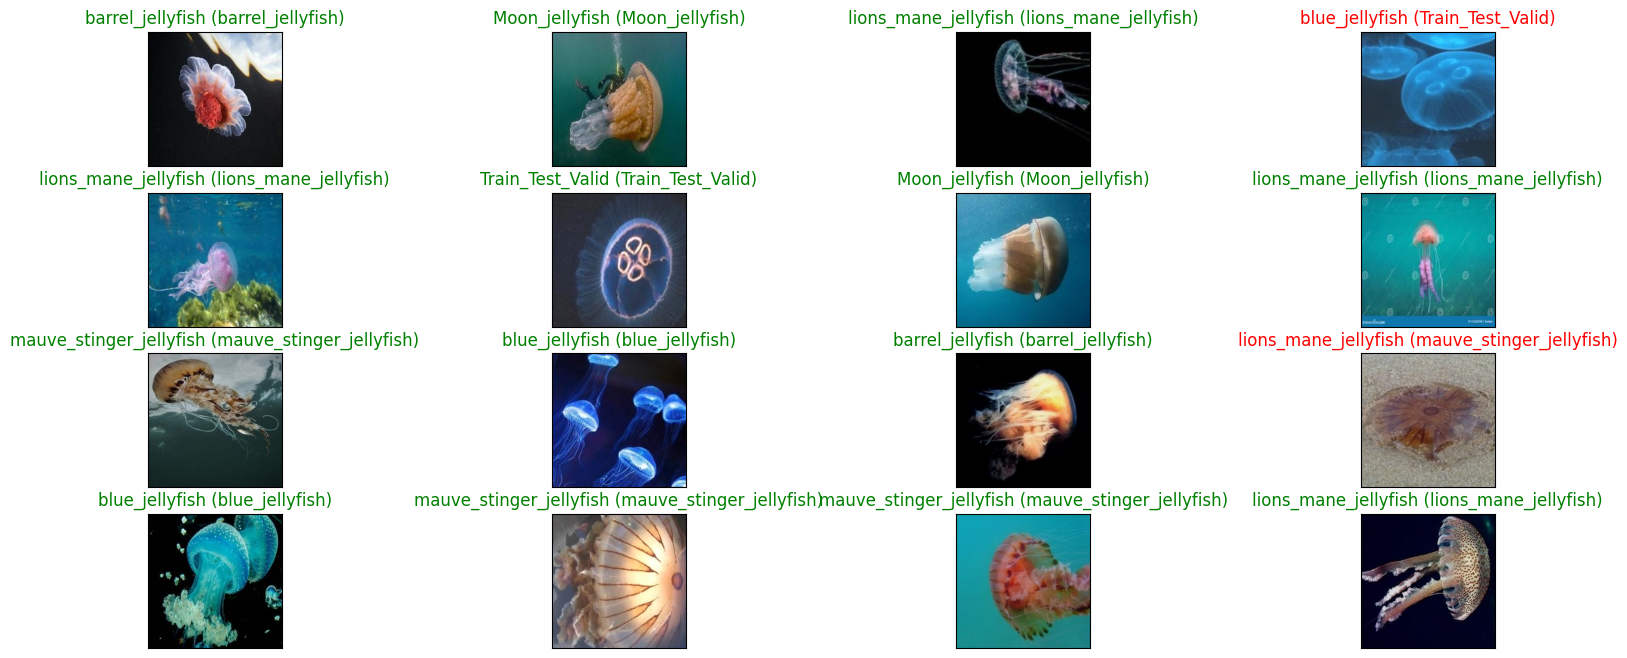

In [25]:
from keras.callbacks import ReduceLROnPlateau
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, verbose=1, min_lr=1e-6)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), callbacks=[lr_scheduler])

model.compile(loss='categorical_crossentropy', optimizer='Nadam', metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=500, epochs=20, callbacks=[lr_scheduler])

y_hat = model.predict(X_test)
test = model.evaluate(X_test, y_test)
print('Test Loss = ', test[0], 'Test Accuracy = ', test[1])

fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(X_test.shape[0], size=16, replace=False)):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(X_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(classes[pred_idx], classes[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))    

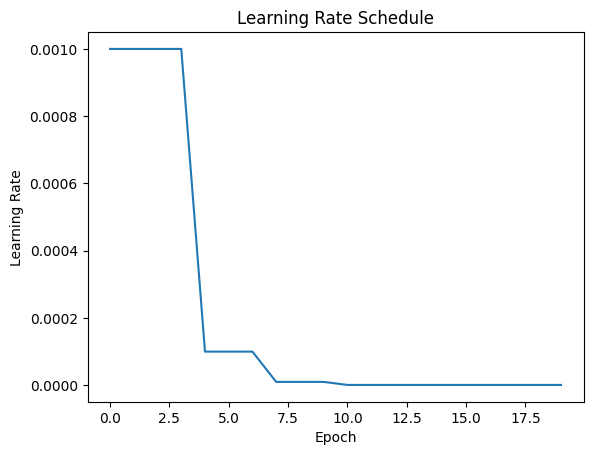

In [26]:
# Extract learning rate values from the history object
learning_rate = history.history['lr']

# Plot learning rate schedule
plt.plot(learning_rate)
plt.title('Learning Rate Schedule')
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.show()


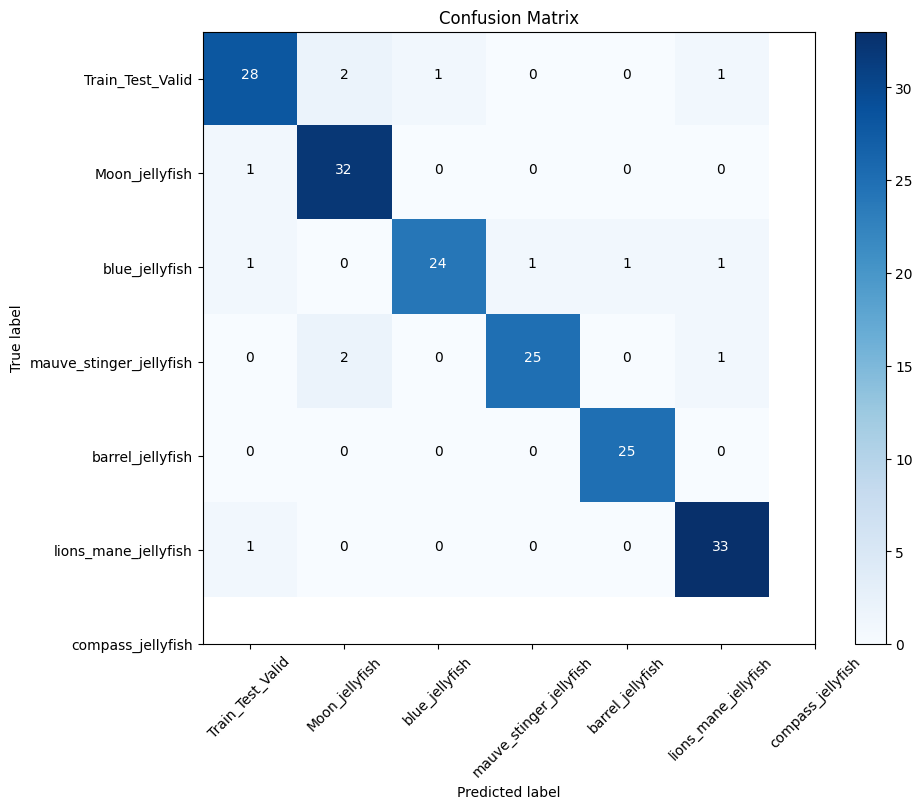

In [27]:
from sklearn.metrics import confusion_matrix, classification_report
import itertools

# Compute confusion matrix
conf_matrix = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_hat, axis=1))

# Plot confusion matrix
plt.figure(figsize=(10, 8))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

fmt = 'd'
thresh = conf_matrix.max() / 2.
for i, j in itertools.product(range(conf_matrix.shape[0]), range(conf_matrix.shape[1])):
    plt.text(j, i, format(conf_matrix[i, j], fmt),
             horizontalalignment="center",
             color="white" if conf_matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [28]:

# Define AlexNet model
def create_alexnet_model(input_shape, num_classes):
    model = Sequential([
        Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=input_shape),
        MaxPooling2D(pool_size=(3,3), strides=(2,2)),
        Conv2D(filters=256, kernel_size=(5,5), padding='same', activation='relu'),
        MaxPooling2D(pool_size=(3,3), strides=(2,2)),
        Conv2D(filters=384, kernel_size=(3,3), padding='same', activation='relu'),
        Conv2D(filters=384, kernel_size=(3,3), padding='same', activation='relu'),
        Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'),
        MaxPooling2D(pool_size=(3,3), strides=(2,2)),
        Flatten(),
        Dense(4096, activation='relu'),
        Dense(4096, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    return model


 
# Load data and preprocess
data_directory = '/kaggle/input/jellyfish-types'
images, labels, classes = load_data(data_directory)
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)
y_train = to_categorical(y_train, num_classes=6)
y_test = to_categorical(y_test, num_classes=6)

model.summary()    



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 16)      208       
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      2080      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        8256      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 28, 28, 64)        0

In [29]:
# Define and compile AlexNet model
alexnet_model = create_alexnet_model(input_shape=(224, 224, 3), num_classes=6)
alexnet_model.compile(optimizer= 'Adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train AlexNet model
alexnet_history = alexnet_model.fit(X_train, y_train, epochs=20, batch_size=128, validation_data=(X_test, y_test))



Epoch 1/20
6/6 [==============================] - 53s 8s/step - loss: 3.4852 - accuracy: 0.1653 - val_loss: 1.7903 - val_accuracy: 0.1833
Epoch 2/20
6/6 [==============================] - 50s 8s/step - loss: 1.7943 - accuracy: 0.1347 - val_loss: 1.7901 - val_accuracy: 0.1833
Epoch 3/20
6/6 [==============================] - 51s 8s/step - loss: 1.7972 - accuracy: 0.1986 - val_loss: 1.7886 - val_accuracy: 0.2444
Epoch 4/20
6/6 [==============================] - 49s 8s/step - loss: 1.7866 - accuracy: 0.1986 - val_loss: 1.7741 - val_accuracy: 0.1444
Epoch 5/20
6/6 [==============================] - 50s 8s/step - loss: 1.7551 - accuracy: 0.2181 - val_loss: 1.8337 - val_accuracy: 0.2667
Epoch 6/20
6/6 [==============================] - 50s 8s/step - loss: 1.7049 - accuracy: 0.2583 - val_loss: 1.6706 - val_accuracy: 0.3389
Epoch 7/20
6/6 [==============================] - 50s 8s/step - loss: 1.6933 - accuracy: 0.3181 - val_loss: 1.7590 - val_accuracy: 0.2056
Epoch 8/20
6/6 [==================

In [30]:
# Extract accuracy, validation accuracy, and validation loss from the history
accuracy = alexnet_history.history['accuracy']
val_accuracy = alexnet_history.history['val_accuracy']

# Find the epoch with the highest accuracy
best_accuracy_epoch = accuracy.index(max(accuracy)) + 1

# Find the epoch with the highest validation accuracy
best_val_accuracy_epoch = val_accuracy.index(max(val_accuracy)) + 1

# Print the best accuracy and its corresponding epoch
print(f"Best Accuracy: {accuracy[best_accuracy_epoch-1]:.4f} at Epoch {best_accuracy_epoch}")

# Print the best validation accuracy and its corresponding epoch
print(f"Best Validation Accuracy: {val_accuracy[best_val_accuracy_epoch-1]:.4f} at Epoch {best_val_accuracy_epoch}")

Best Accuracy: 0.6306 at Epoch 20
Best Validation Accuracy: 0.5667 at Epoch 19


In [31]:
# Evaluate the model on the test data
# Print the test loss and test accuracy
y_hat = alexnet_model.predict(X_test)
test = alexnet_model.evaluate(X_test, y_test)
print('Test Loss = ', test[0], 'Test Accuracy = ', test[1])

6/6 [==============================] - 4s 614ms/step - loss: 1.1495 - accuracy: 0.5556
Test Loss =  1.1494736671447754 Test Accuracy =  0.5555555820465088


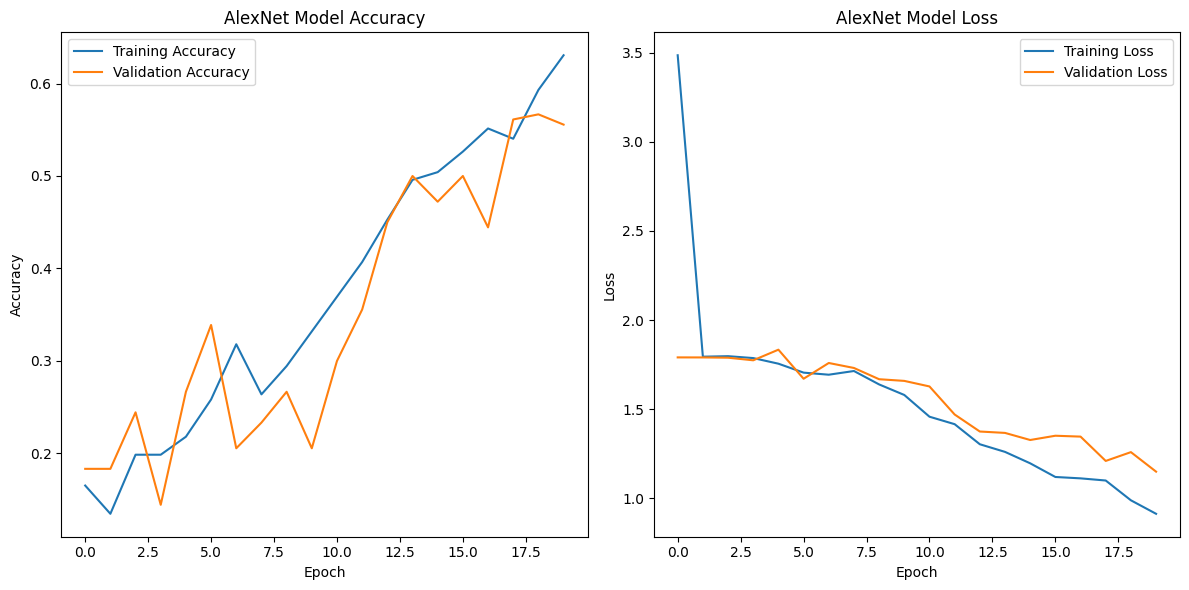

In [32]:

# Plot training and validation accuracy over epochs
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(alexnet_history.history['accuracy'], label='Training Accuracy')
plt.plot(alexnet_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('AlexNet Model Accuracy')
plt.legend()

# Plot training and validation loss over epochs
plt.subplot(1, 2, 2)
plt.plot(alexnet_history.history['loss'], label='Training Loss')
plt.plot(alexnet_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('AlexNet Model Loss')
plt.legend()

plt.tight_layout()
plt.show()

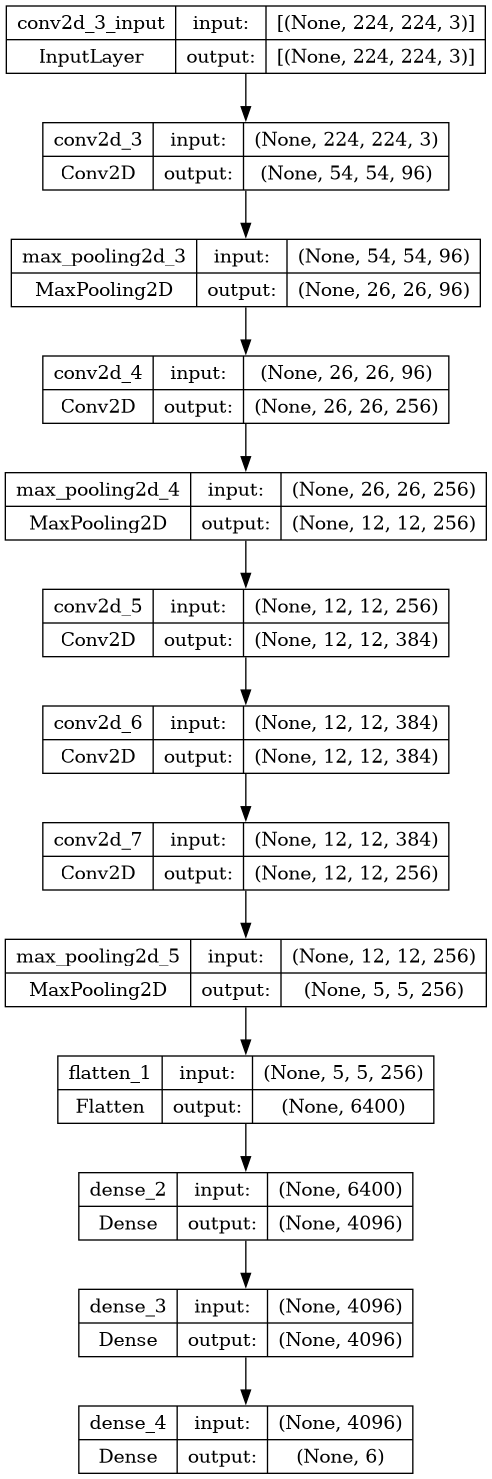

In [33]:
from keras.utils import plot_model

# Assuming this is the variable name of your AlexNet model
plot_model(alexnet_model, to_file='alexnet_model_plot.png', show_shapes=True, show_layer_names=True)

In [34]:
# Define ConvNet Tiny model
def create_convnet_tiny_model(input_shape, num_classes):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    return model

# Load data and preprocess (if not already loaded)
data_directory = '/kaggle/input/jellyfish-types'
images, labels, classes = load_data(data_directory)
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)
y_train = to_categorical(y_train, num_classes=6)
y_test = to_categorical(y_test, num_classes=6)

model.summary()    


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 16)      208       
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      2080      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        8256      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 28, 28, 64)        0

In [35]:
# Define and compile ConvNet Tiny model
convnet_tiny_model = create_convnet_tiny_model(input_shape=(224, 224, 3), num_classes=6)
convnet_tiny_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train ConvNet Tiny model
convnet_tiny_history = convnet_tiny_model.fit(X_train, y_train, epochs=15, batch_size=128, validation_data=(X_test, y_test))


Epoch 1/15
6/6 [==============================] - 45s 7s/step - loss: 3.1760 - accuracy: 0.2292 - val_loss: 1.8336 - val_accuracy: 0.2389
Epoch 2/15
6/6 [==============================] - 36s 6s/step - loss: 1.6630 - accuracy: 0.3069 - val_loss: 1.5754 - val_accuracy: 0.3778
Epoch 3/15
6/6 [==============================] - 36s 6s/step - loss: 1.4130 - accuracy: 0.4458 - val_loss: 1.4798 - val_accuracy: 0.4222
Epoch 4/15
6/6 [==============================] - 37s 6s/step - loss: 1.2652 - accuracy: 0.5028 - val_loss: 1.7447 - val_accuracy: 0.4444
Epoch 5/15
6/6 [==============================] - 36s 6s/step - loss: 1.1676 - accuracy: 0.5514 - val_loss: 1.4786 - val_accuracy: 0.4111
Epoch 6/15
6/6 [==============================] - 36s 6s/step - loss: 1.0528 - accuracy: 0.5972 - val_loss: 1.5546 - val_accuracy: 0.4889
Epoch 7/15
6/6 [==============================] - 36s 6s/step - loss: 0.8554 - accuracy: 0.6889 - val_loss: 1.2164 - val_accuracy: 0.5444
Epoch 8/15
6/6 [==================

In [36]:
# Extract accuracy, validation accuracy, and validation loss from the history
convnet_tiny_accuracy = convnet_tiny_history.history['accuracy']
convnet_tiny_val_accuracy = convnet_tiny_history.history['val_accuracy']

# Find the epoch with the highest accuracy
best_convnet_tiny_accuracy_epoch = convnet_tiny_accuracy.index(max(convnet_tiny_accuracy)) + 1

# Find the epoch with the highest validation accuracy
best_convnet_tiny_val_accuracy_epoch = convnet_tiny_val_accuracy.index(max(convnet_tiny_val_accuracy)) + 1

# Print the best accuracy and its corresponding epoch
print(f"Best Accuracy for ConvNet Tiny: {convnet_tiny_accuracy[best_convnet_tiny_accuracy_epoch-1]:.4f} at Epoch {best_convnet_tiny_accuracy_epoch}")

# Print the best validation accuracy and its corresponding epoch
print(f"Best Validation Accuracy for ConvNet Tiny: {convnet_tiny_val_accuracy[best_convnet_tiny_val_accuracy_epoch-1]:.4f} at Epoch {best_convnet_tiny_val_accuracy_epoch}")

Best Accuracy for ConvNet Tiny: 0.9875 at Epoch 15
Best Validation Accuracy for ConvNet Tiny: 0.6611 at Epoch 13


In [37]:
# Print the test loss and test accuracy
y_hat = convnet_tiny_model.predict(X_test)
test = convnet_tiny_model.evaluate(X_test, y_test)
print('Test Loss = ', test[0], 'Test Accuracy = ', test[1])

6/6 [==============================] - 3s 410ms/step - loss: 1.5764 - accuracy: 0.6222
Test Loss =  1.576395034790039 Test Accuracy =  0.6222222447395325


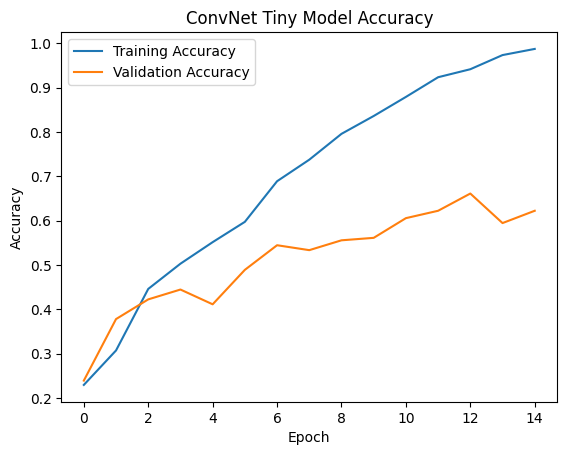

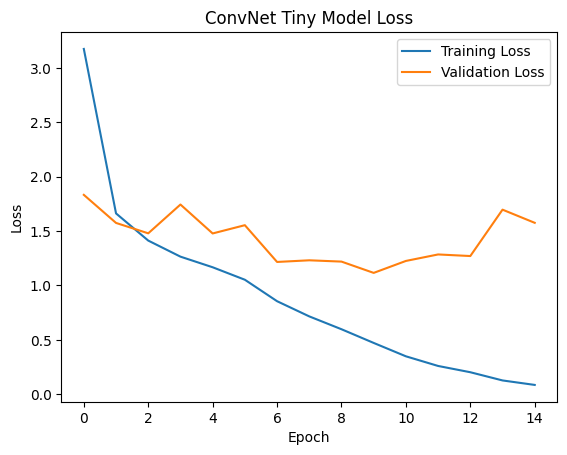

In [38]:
# Extract loss and validation loss from the history
convnet_tiny_loss = convnet_tiny_history.history['loss']
convnet_tiny_val_loss = convnet_tiny_history.history['val_loss']

# Find the epoch with the lowest loss
best_convnet_tiny_loss_epoch = convnet_tiny_loss.index(min(convnet_tiny_loss)) + 1

# Plot training and validation accuracy over epochs
plt.plot(convnet_tiny_history.history['accuracy'], label='Training Accuracy')
plt.plot(convnet_tiny_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('ConvNet Tiny Model Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss over epochs
plt.plot(convnet_tiny_loss, label='Training Loss')
plt.plot(convnet_tiny_val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('ConvNet Tiny Model Loss')
plt.legend()
plt.show()



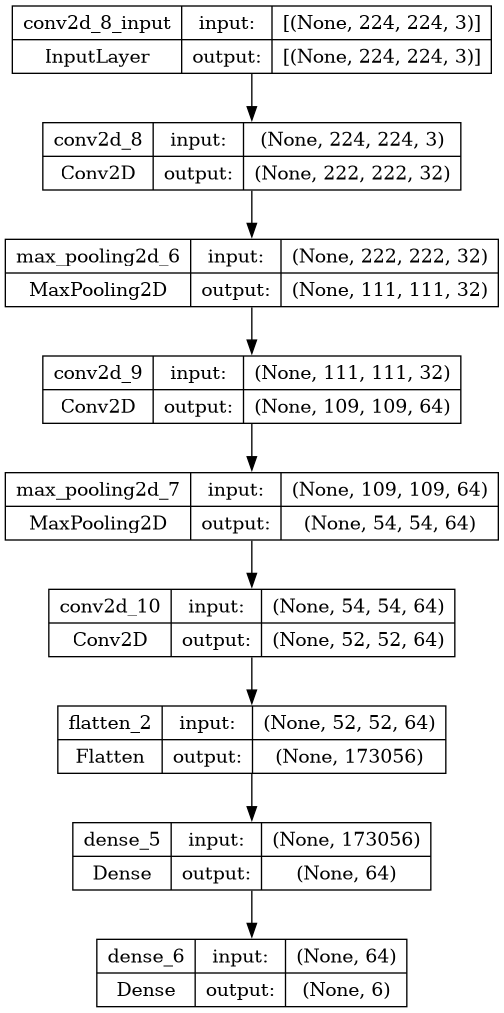

In [39]:
from keras.utils import plot_model

# Assuming this is the variable name of the ConvNet Tiny model
plot_model(convnet_tiny_model, to_file='convnet_tiny_model_plot.png', show_shapes=True, show_layer_names=True)

In [40]:
# Define another VGGNet model
def create_another_vggnet_model(input_shape, num_classes):
    model = Sequential([
        Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(256, activation='relu'),
        Dense(num_classes, activation='softmax')
        
    ])
    return model

  



In [41]:

# Define the input shape and number of classes
input_shape = (224, 224, 3)
num_classes = 6

# Create and compile another VGGNet model
another_vggnet_model = create_another_vggnet_model(input_shape, num_classes)
another_vggnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

another_vggnet_model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 26, 26, 128)      

In [42]:
# Train the model
another_vggnet_history = another_vggnet_model.fit(X_train, y_train, epochs=15, batch_size=128, validation_data=(X_test, y_test))

Epoch 1/15
6/6 [==============================] - 45s 7s/step - loss: 3.5687 - accuracy: 0.1708 - val_loss: 1.8199 - val_accuracy: 0.2278
Epoch 2/15
6/6 [==============================] - 42s 7s/step - loss: 1.7532 - accuracy: 0.2528 - val_loss: 1.7159 - val_accuracy: 0.2389
Epoch 3/15
6/6 [==============================] - 42s 7s/step - loss: 1.5930 - accuracy: 0.3181 - val_loss: 1.6089 - val_accuracy: 0.2833
Epoch 4/15
6/6 [==============================] - 42s 7s/step - loss: 1.4291 - accuracy: 0.4125 - val_loss: 1.5864 - val_accuracy: 0.2833
Epoch 5/15
6/6 [==============================] - 42s 7s/step - loss: 1.2174 - accuracy: 0.5111 - val_loss: 1.4328 - val_accuracy: 0.3833
Epoch 6/15
6/6 [==============================] - 44s 7s/step - loss: 1.0295 - accuracy: 0.6028 - val_loss: 1.5377 - val_accuracy: 0.4667
Epoch 7/15
6/6 [==============================] - 42s 7s/step - loss: 0.9650 - accuracy: 0.6528 - val_loss: 1.3254 - val_accuracy: 0.4611
Epoch 8/15
6/6 [==================

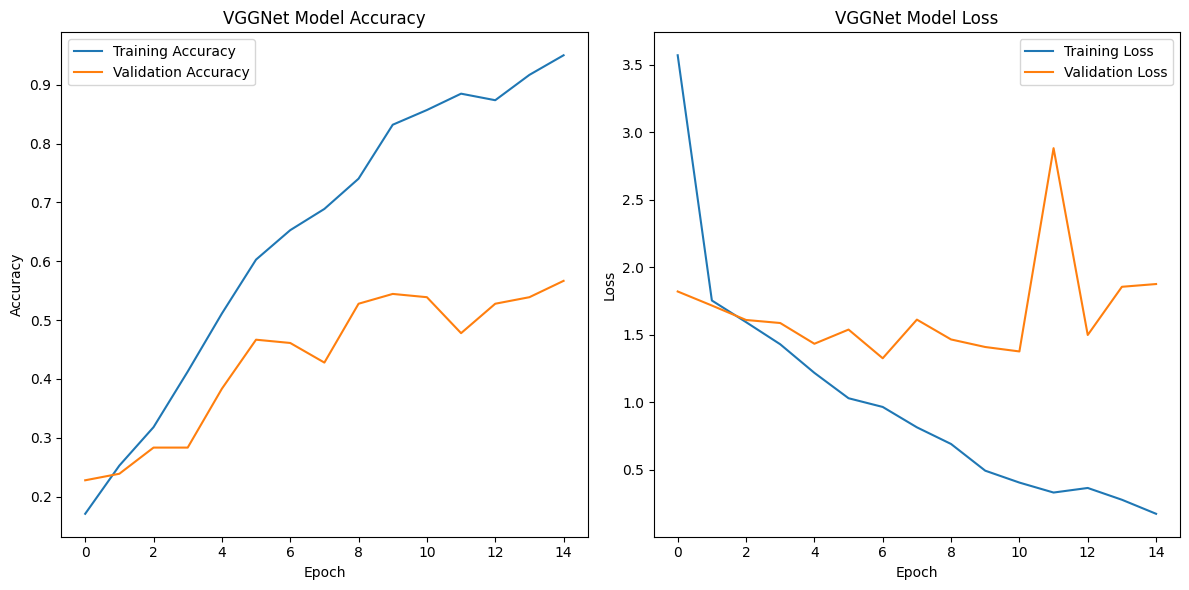

In [43]:
# Plot training and validation accuracy over epochs
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(another_vggnet_history.history['accuracy'], label='Training Accuracy')
plt.plot(another_vggnet_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('VGGNet Model Accuracy')
plt.legend()

# Plot training and validation loss over epochs
plt.subplot(1, 2, 2)
plt.plot(another_vggnet_history.history['loss'], label='Training Loss')
plt.plot(another_vggnet_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('VGGNet Model Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [44]:
# Extract accuracy and validation accuracy from the history
accuracy = another_vggnet_history.history['accuracy']
val_accuracy = another_vggnet_history.history['val_accuracy']

# Find the epoch with the highest accuracy
best_accuracy_epoch = accuracy.index(max(accuracy)) + 1

# Find the epoch with the highest validation accuracy
best_val_accuracy_epoch = val_accuracy.index(max(val_accuracy)) + 1

print(f"Best Accuracy: {accuracy[best_accuracy_epoch-1]:.4f} at Epoch {best_accuracy_epoch}")
print(f"Best Validation Accuracy: {val_accuracy[best_val_accuracy_epoch-1]:.4f} at Epoch {best_val_accuracy_epoch}")


Best Accuracy: 0.9500 at Epoch 15
Best Validation Accuracy: 0.5667 at Epoch 15


In [45]:
# Print the test loss and test accuracy
y_hat =another_vggnet_model.predict(X_test)
test =another_vggnet_model.evaluate(X_test, y_test)
print('Test Loss = ', test[0], 'Test Accuracy = ', test[1])

6/6 [==============================] - 3s 478ms/step - loss: 1.8749 - accuracy: 0.5667
Test Loss =  1.8749417066574097 Test Accuracy =  0.5666666626930237


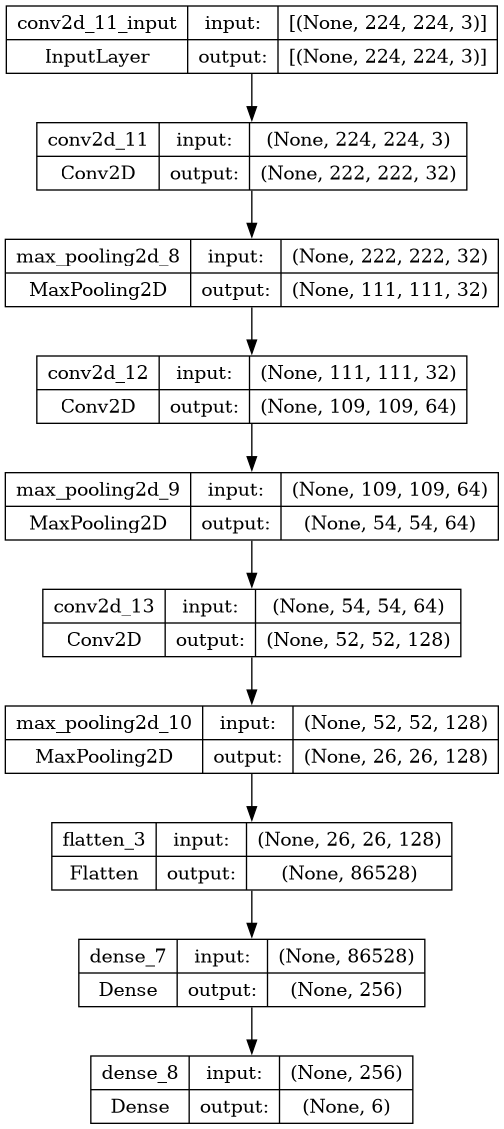

In [46]:
from keras.utils import plot_model

# Assuming this is the variable name of the VGGNet model
plot_model(another_vggnet_model, to_file='another_vggnet_model_plot.png', show_shapes=True, show_layer_names=True)
